# Penguins species prediction

In [1]:
import pandas as pd
import numpy  as np

 Original data sources
 https://www.kaggle.com/pratik1120/penguin-dataset-eda-classification-and-clustering

In [2]:
penguins = pd.read_csv('penguins_cleaned.csv')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181,3750,male
1,Adelie,Torgersen,39.5,17.4,186,3800,female
2,Adelie,Torgersen,40.3,18.0,195,3250,female
3,Adelie,Torgersen,36.7,19.3,193,3450,female
4,Adelie,Torgersen,39.3,20.6,190,3650,male
...,...,...,...,...,...,...,...
328,Chinstrap,Dream,55.8,19.8,207,4000,male
329,Chinstrap,Dream,43.5,18.1,202,3400,female
330,Chinstrap,Dream,49.6,18.2,193,3775,male
331,Chinstrap,Dream,50.8,19.0,210,4100,male


In [4]:
df = penguins.copy()
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [8]:
df.groupby(df['species']).mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


In [9]:
df.groupby(df['sex']).mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
sex,,,,
female,42.096970,16.425455,197.363636,3862.272727
male,45.854762,17.891071,204.505952,4545.684524


In [20]:
df.groupby(df['island']).count()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,,,,,,
Biscoe,163,163,163,163,163,163
Dream,123,123,123,123,123,123
Torgersen,47,47,47,47,47,47


In [21]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [19]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\mukesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bill_length_mm', ylabel='Density'>

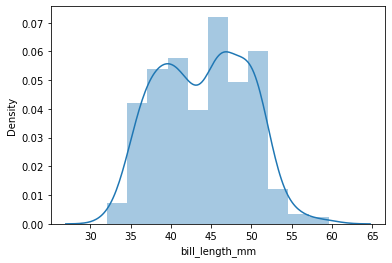

In [21]:
sns.distplot(df['bill_length_mm']	)

C:\Users\mukesh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bill_depth_mm', ylabel='Density'>

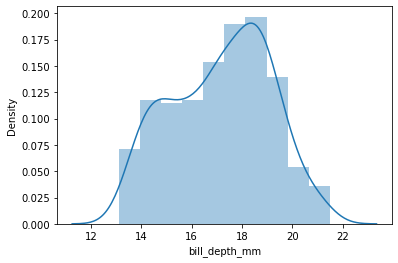

In [22]:
sns.distplot(df['bill_depth_mm'], bins= 10	)

In [24]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [27]:
df1=df.bill_length_mm.quantile(.99)
df1
df.max()

species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm          231
body_mass_g               6300
sex                       male
dtype: object

In [29]:
min_thresold, max_trresold= df.bill_length_mm.quantile([.001,.999])
min_thresold, max_trresold

(32.432, 59.0688000000001)

In [32]:
df[(df.bill_length_mm <min_thresold) | (df.bill_length_mm > max_trresold)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
136,Adelie,Dream,32.1,15.5,188,3050,female
178,Gentoo,Biscoe,59.6,17.0,230,6050,male


In [33]:
df= df[(df.bill_length_mm > min_thresold) & (df.bill_length_mm < max_trresold)]

In [34]:
target = 'species'
encode = ['sex','island']

for col in encode:
    dummy = pd.get_dummies(df[col], prefix=col)
    df = pd.concat([df,dummy], axis=1)
    del df[col]

In [35]:
target_mapper = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
def target_encode(val):
    return target_mapper[val]

In [36]:
df['species'] = df['species'].apply(target_encode)

df

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_female,sex_male,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181,3750,0,1,0,0,1
1,0,39.5,17.4,186,3800,1,0,0,0,1
2,0,40.3,18.0,195,3250,1,0,0,0,1
3,0,36.7,19.3,193,3450,1,0,0,0,1
4,0,39.3,20.6,190,3650,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
328,1,55.8,19.8,207,4000,0,1,0,1,0
329,1,43.5,18.1,202,3400,1,0,0,1,0
330,1,49.6,18.2,193,3775,0,1,0,1,0
331,1,50.8,19.0,210,4100,0,1,0,1,0


In [37]:
# Separating X and y
X = df.drop('species', axis=1)
y = df['species']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=10)

In [39]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

1.0

In [49]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test,y_test)

C:\Users\mukesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0

In [50]:
import pickle
pickle.dump(clf, open('penguins_clf.pkl', 'wb'))